In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

ModuleNotFoundError: No module named 'plotly_express'

In [4]:
url="https://raw.githubusercontent.com/YuLe33/Final-Project-df_full_premierleague1/main/data%20set/df_full_premierleague.csv"
data=pd.read_csv(url)
del(data['Unnamed: 0'],data['link_match'])
data["home_win"]=np.nan
data["date"]=pd.to_datetime(data.date)
data=data.sort_values(by="date")
data = data.reset_index(drop=True)

In [5]:
scors = data["result_full"].str.extract("(\d+)-(\d+)")
data["home_win"] =(scors[0]>scors[1]).astype(int)
tie=(scors[0]==scors[1])
tie
data.loc[tie,"home_win"] = -1
data

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_win
0,10/11,2010-08-14,Aston Villa,West Ham United,3-0,2-0,24.0,15.0,16.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,0-0,54.0,4.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,10/11,2010-08-14,Chelsea,West Bromwich Albion,6-0,2-0,10.0,3.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,10/11,2010-08-14,Sunderland,Birmingham City,2-2,1-0,49.0,3.0,15.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,0-0,20.0,10.0,13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,14.0,4.0,...,681.5,1.8,1.70,1.15,15.0,0.78,0.59,5.0,61.7,0
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,5.0,2.0,...,689.1,1.4,1.31,1.04,7.0,0.65,0.65,0.0,47.4,-1
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,11.0,1.0,...,526.8,1.8,1.04,1.69,-17.0,0.35,0.69,-9.0,33.3,-1
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,0-1,13.0,9.0,10.0,3.0,...,675.7,1.8,0.78,1.22,-12.0,0.37,0.59,-6.0,28.4,0


In [6]:
data[["season","date","home_team","away_team","result_ht","home_win"]]

,season,date,home_team,away_team,result_ht,home_win
0,10/11,2010-08-14,Aston Villa,West Ham United,2-0,1
1,10/11,2010-08-14,Bolton Wanderers,Fulham,0-0,-1
2,10/11,2010-08-14,Chelsea,West Bromwich Albion,2-0,1
3,10/11,2010-08-14,Sunderland,Birmingham City,1-0,-1
4,10/11,2010-08-14,Tottenham Hotspur,Manchester City,0-0,-1
...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-0,0
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,-1
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,-1
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,0


In [7]:
home, away = data['result_full'].str.split('-',1).str
data['home_goals'] = home
data['away_goals'] = away
data['home_goals'] = data['home_goals'].astype(int)
data['away_goals'] = data['away_goals'].astype(int)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


In [8]:
data['home_win_score'] = (data.loc[:,'home_goals']-data.loc[:,'away_goals'])>0
data['away_win_score'] = (data.loc[:,'away_goals']-data.loc[:,'home_goals'])>0
data['home_win_score'] = data['home_win_score'].astype(int)
data['away_win_score'] = data['away_win_score'].astype(int)

In [9]:
total_home_goals = data.groupby('home_team')['home_goals'].sum().sort_values(ascending=False).reset_index()
# total_home_goals
sketch = px.bar(total_home_goals.head(15),x='home_team', y='home_goals',color='home_team')
sketch.update_layout(title='Most Home Goals since 10/11',xaxis_title='Team',yaxis_title='Goals')
sketch.show()

NameError: name 'px' is not defined

In [10]:
total_away_goals = data.groupby('away_team')['away_goals'].sum().sort_values(ascending=False).reset_index()
# total_away_goals
sketch_2 = px.bar(total_away_goals.head(15),x='away_team',y='away_goals',color='away_team')
sketch_2.update_layout(title='Most Away Goals sincs 10/11',xaxis_title='Team',yaxis_title='Goals')
sketch_2.show()

NameError: name 'px' is not defined

In [11]:
total_home_wins = data.groupby('home_team')['home_win_score'].sum().sort_values(ascending=False).reset_index()
# total_home_wins 
home_wins_sketch = px.bar(total_home_wins.head(15),x='home_team',y='home_win_score',color='home_team')
home_wins_sketch.update_layout(title='Most Home Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
home_wins_sketch.show()

NameError: name 'px' is not defined

In [12]:
total_away_wins = data.groupby('away_team')['away_win_score'].sum().sort_values(ascending=False).reset_index()
# total_away_wins
away_wins_sketch = px.bar(total_away_wins.head(15),x='away_team',y='away_win_score',color='away_team')
away_wins_sketch.update_layout(title='Most Away Wins since 10/11',xaxis_title='Team',yaxis_title='Wins')
away_wins_sketch.show()

NameError: name 'px' is not defined

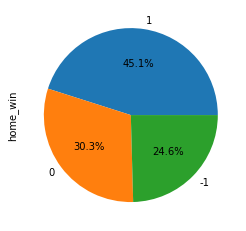

In [13]:
home=data["home_win"].value_counts().plot.pie(autopct='%1.1f%%')

As we found that the last game as played before covid 19 arrive to England was at 1-3-2020


In [14]:
#data[data.loc[:,"date"]=="2020-3"]

In [15]:
before_covid=data.iloc[0:3697]

The desicion to open the doors of the football stadium had happen at the 7 of may, due to all of the games of season 20/21 we have in the data set is without crowd

In [16]:
data[data.loc[:,"season"]=="20/21"]

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_win,home_goals,away_goals,home_win_score,away_win_score
3799,20/21,2020-09-12,Fulham,Arsenal,0-3,0-1,7.0,2.0,12.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0,0,3,0,1
3800,20/21,2020-09-12,West Ham United,Newcastle United,0-2,0-0,18.0,8.0,13.0,2.0,...,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1
3801,20/21,2020-09-12,Liverpool,Leeds United,4-3,3-2,11.0,9.0,9.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1,4,3,1,0
3802,20/21,2020-09-12,Crystal Palace,Southampton,1-0,1-0,22.0,7.0,14.0,4.0,...,NaN,NaN,NaN,NaN,NaN,1,1,0,1,0
3803,20/21,2020-09-13,West Bromwich Albion,Leicester City,0-3,0-0,13.0,2.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,14.0,4.0,...,15.0,0.78,0.59,5.0,61.7,0,1,2,0,1
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,5.0,2.0,...,7.0,0.65,0.65,0.0,47.4,-1,1,1,0,0
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,11.0,1.0,...,-17.0,0.35,0.69,-9.0,33.3,-1,0,0,0,0
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,0-1,13.0,9.0,10.0,3.0,...,-12.0,0.37,0.59,-6.0,28.4,0,0,1,0,1


In [17]:
covid_times=data.iloc[3698:]

In [18]:
covid_times

,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,home_offsides,...,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away,home_win,home_goals,away_goals,home_win_score,away_win_score
3698,19/20,2020-03-07,Sheffield United,Norwich City,1-0,1-0,31.0,10.0,12.0,1.0,...,-26.0,0.46,0.86,-11.0,25.0,1,1,0,1,0
3699,19/20,2020-03-07,Burnley,Tottenham Hotspur,1-1,1-0,21.0,3.0,16.0,2.0,...,7.0,0.86,0.68,5.0,47.6,-1,1,1,0,0
3700,19/20,2020-03-07,Southampton,Newcastle United,0-1,0-0,18.0,5.0,14.0,0.0,...,-17.0,0.39,0.64,-7.0,38.1,0,0,1,0,1
3701,19/20,2020-03-07,Wolverhampton Wanderers,Brighton and Hove Albion,0-0,0-0,14.0,2.0,4.0,0.0,...,-8.0,0.43,0.68,-7.0,33.3,-1,0,0,0,0
3702,19/20,2020-03-07,Crystal Palace,Watford,1-0,1-0,33.0,8.0,12.0,2.0,...,-16.0,0.46,0.64,-5.0,32.1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,20/21,2021-03-06,Brighton and Hove Albion,Leicester City,1-2,1-0,5.0,6.0,14.0,4.0,...,15.0,0.78,0.59,5.0,61.7,0,1,2,0,1
4066,20/21,2021-03-06,Burnley,Arsenal,1-1,1-1,16.0,2.0,5.0,2.0,...,7.0,0.65,0.65,0.0,47.4,-1,1,1,0,0
4067,20/21,2021-03-07,West Bromwich Albion,Newcastle United,0-0,0-0,21.0,9.0,11.0,1.0,...,-17.0,0.35,0.69,-9.0,33.3,-1,0,0,0,0
4068,20/21,2021-03-07,Liverpool,Fulham,0-1,0-1,13.0,9.0,10.0,3.0,...,-12.0,0.37,0.59,-6.0,28.4,0,0,1,0,1


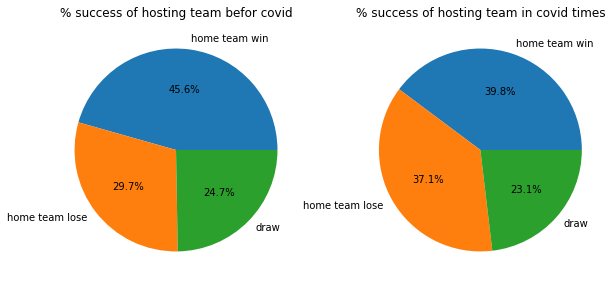

In [19]:
fig,(before_covid_pie,covid_times_pie)=plt.subplots(1,2,figsize=(10,10))
labels = "home team win","home team lose","draw"
values = before_covid["home_win"].value_counts()
before_covid_pie.pie(values,labels = labels,autopct = '%1.1f%%') #plot first pie
before_covid_pie.set_title("% success of hosting team befor covid")

labels = "home team win","home team lose","draw"
values = covid_times["home_win"].value_counts()
covid_times_pie.pie(values,labels = labels,autopct = '%1.1f%%') #plot second pie
covid_times_pie.set_title("% success of hosting team in covid times")
plt.show()